1.	Load the MINST data into a pandas dataframe named MINST_firstname where first name is you name

In [4]:
import pandas as pd 
from sklearn.datasets import fetch_openml
MINST_renee = fetch_openml('mnist_784', version=1)
type(MINST_renee)

c:\Users\renee\anaconda3\envs\IA\Lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


sklearn.utils._bunch.Bunch

2.	List the keys

In [5]:
MINST_renee.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

3.	Assign the data to a ndarray named X_firstname where firstname is your first name.

In [6]:
import numpy as np
X_renee = np.array(MINST_renee['data'])

In [80]:
print(X_renee)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


4.	Assign the target to a variable named y_firstname where firstname is your first name.

In [7]:
y_renee = np.array(MINST_renee['target'])
y_renee

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

5.	Print the types of X_firstname and y_firstname.

In [100]:
type(X_renee)
type(y_renee)

numpy.ndarray

6.	Print the shape of X_firstname and y_firstname.

In [9]:
X_renee.shape
# y_renee.shape

(70000, 784)

Now crate the variables :
some_digit12
some_digit13
some_digit14
and Store in these variables the values from X_firstname indexed 3,8,1 in order.

In [10]:
some_digit12 = X_renee[3]
some_digit13 = X_renee[8]
some_digit14 = X_renee[1]

8.	Use imshow method to plot the values of the three variables you defined in the above point. Note the values in your Analysis report (written response).

(-0.5, 27.5, 27.5, -0.5)

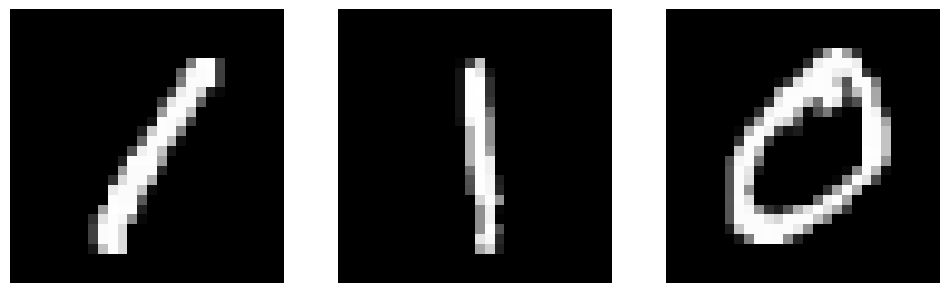

In [11]:
import matplotlib.pyplot as plt
digit12 = some_digit12.reshape(28,28)
digit13 = some_digit13.reshape(28,28)
digit14 = some_digit14.reshape(28,28)
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(digit12, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(digit13, cmap='gray')
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(digit14, cmap='gray')
plt.axis("off")



9.	Change the type of y to unit8

In [12]:

y_renee = y_renee.astype(np.uint8)
print(y_renee.dtype)
y_renee

uint8


array([5, 0, 4, ..., 4, 5, 6], dtype=uint8)

10.	The current target values range from 0 to 9 i.e. 10 classes. Transform the target variable to 3 classes as follows:
a.	Any digit between 0 and 3 inclusive should be assigned a target value of 0
b.	Any digit between 4 and 6 inclusive should be assigned a target value of 1
c.	Any digit between 7 and 9 inclusive should be assigned a target value of 9 (Hint: you can use numpy.where to carry out the transformation on the target.)

In [13]:
y_renee_new = np.where(y_renee <= 3, 0, np.where(y_renee <= 6, 1, 9))
print(y_renee_new)

[1 0 1 ... 1 1 1]


11.	Print the frequencies of each of the three target classes and note it in your written report in addition provide a screenshot showing a bar chart.

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
df_renee = pd.DataFrame(y_renee_new)
frec_renee = df_renee.value_counts()
print(frec_renee)

0    28911
9    21076
1    20013
Name: count, dtype: int64


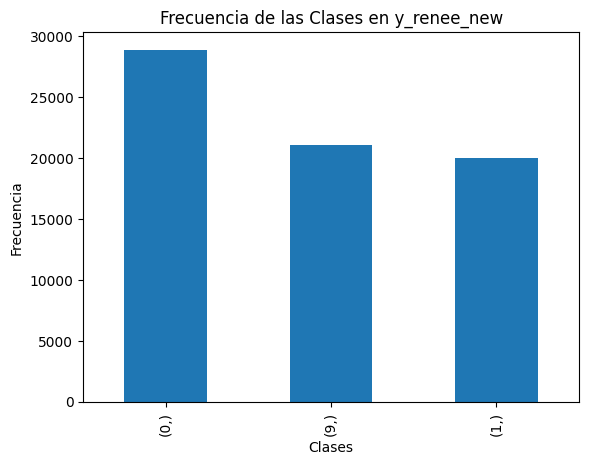

In [52]:
frec_renee.plot(kind='bar')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de las Clases en y_renee_new')
plt.show()


12.	Split your data into train, test. Assign the first 50,000 records for training and the last 20,000
records for testing. (Hint you don’t need sklearn train test as the data is already randomized).


In [15]:
X_train = X_renee[:50000]
X_test = X_renee[-20000:]
y_train = y_renee_new[:50000]
y_test = y_renee_new[-20000:]

Build Classification Models  Naive Bayes
Train a Naive Bayes classifier using the training data. 
Name the classifier NB_clf_firstname.


In [108]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
NB_clf_renee = GaussianNB()
NB_clf_renee.fit(X_train, y_train)
y_pred = NB_clf_renee.predict(X_test)
print(y_pred)


[9 9 1 ... 9 1 1]


13.	Use 3-fold cross validation to validate the training process, and note the results in your written response.

In [44]:
from sklearn.model_selection import cross_val_score
y_pred_cross = cross_val_score(NB_clf_renee, X_train, y_train, cv=3)
print("average: ", y_pred_cross.mean())


average:  0.5873402788754497


14.	Use the model to score the accuracy against the test data, note the result in your written response.

In [53]:
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.5887


Generate the accuracy matrix.

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))     

[[3614  372 4246]
 [ 464 2374 2859]
 [ 167  118 5786]]
              precision    recall  f1-score   support

           0       0.85      0.44      0.58      8232
           1       0.83      0.42      0.55      5697
           9       0.45      0.95      0.61      6071

    accuracy                           0.59     20000
   macro avg       0.71      0.60      0.58     20000
weighted avg       0.72      0.59      0.58     20000

0.5887


16.	Use the classifier to predict the three variables you defined in point 7 above. Note the results in your written response and compare against the actual results.

In [114]:
pred_digit12 = NB_clf_renee.predict([some_digit12])
print(pred_digit12)


[9]


In [111]:
pred_digit13 = NB_clf_renee.predict([some_digit13])
print(pred_digit13)

[9]


In [113]:
pred_digit14 = NB_clf_renee.predict([some_digit14])
print(pred_digit14)

[9]


Train a Logistic regression classifier using the same training data. Name the classifier LR_clf_firstname. (Note this is a multi-class problem make sure to check all the parameters and set multi_class='multinomial').

In [125]:
from sklearn.linear_model import LogisticRegression
LR_clf_renee_lbfgs = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1200, tol=0.1)



In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

LR_clf_renee_lbfgs.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1200, multi_class='multinomial', tol=0.1)

In [133]:
LR_clf_renee_lbfg_pred = LR_clf_renee_lbfgs.predict(X_test_scaled)
LR_clf_renee_lbfg_accuracy = accuracy_score(y_test, LR_clf_renee_lbfg_pred)
LR_clf_renee_lbfg_accuracy

0.8956

In [141]:
LR_clf_renee_saga = LogisticRegression(multi_class='multinomial', solver='saga', max_iter=1200, tol=0.1)

In [144]:
LR_clf_renee_saga.fit(X_train, y_train)
LR_clf_renee_saga_accuracy = accuracy_score(y_test, LR_clf_renee_saga.predict(X_test))
LR_clf_renee_saga_accuracy

0.8953

18.	Use 3-fold cross validation on the training data and note the results in your written response.

In [148]:
y_pred_cross2 = cross_val_score(LR_clf_renee_lbfgs, X_train_scaled, y_train, cv=3)

In [146]:
y_pred_cross2

array([0.89260215, 0.88876222, 0.88539542])

In [149]:
y_pred_cross3 = cross_val_score(LR_clf_renee_saga, X_train, y_train, cv=3)
y_pred_cross3

array([0.89332213, 0.88774225, 0.88521541])

19.	Use the model to score the accuracy against the test data, note the result in your written response.

In [151]:
y_pred_test_lbfgs = LR_clf_renee_lbfgs.predict(X_test_scaled)
test_accuracy_lbfgs = accuracy_score(y_test, y_pred_test_lbfgs)
test_accuracy_lbfgs

0.8956

In [152]:
y_pred_test_saga = LR_clf_renee_saga.predict(X_test)
test_accuracy_saga = accuracy_score(y_test, y_pred_test_saga)
test_accuracy_saga

0.8953

20.	Generate the Generate the accuracy matrix precision and recall of the model and note them in your written response.

In [154]:
print(confusion_matrix(y_test, y_pred_test_lbfgs))
print(classification_report(y_test,y_pred_test_lbfgs))
print(accuracy_score(y_test, y_pred_test_lbfgs))  


[[7575  294  363]
 [ 393 5008  296]
 [ 416  326 5329]]
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      8232
           1       0.89      0.88      0.88      5697
           9       0.89      0.88      0.88      6071

    accuracy                           0.90     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.90      0.90      0.90     20000

0.8956


In [155]:
print(confusion_matrix(y_test, y_pred_test_saga))
print(classification_report(y_test,y_pred_test_saga))
print(accuracy_score(y_test, y_pred_test_saga))  

[[7553  278  401]
 [ 367 4975  355]
 [ 396  297 5378]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      8232
           1       0.90      0.87      0.88      5697
           9       0.88      0.89      0.88      6071

    accuracy                           0.90     20000
   macro avg       0.89      0.89      0.89     20000
weighted avg       0.90      0.90      0.90     20000

0.8953


21.	Use the classifier that worked from the above point to predict the three variables you defined in point 7 above. Note the results in your written response and compare against the actual results

In [161]:

pred_clf_digit12 = LR_clf_renee_lbfgs.predict([some_digit12])
print(pred_clf_digit12)

[0]


In [158]:
pred_clf_digit13 = LR_clf_renee_lbfgs.predict([some_digit13])
print(pred_clf_digit13)

[0]


In [159]:
pred_clf_digit14 = LR_clf_renee_lbfgs.predict([some_digit14])
print(pred_clf_digit14)

[0]
